# Data PreProcessing 

# Data Loading

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Load the wine equality dataset into pandas 
data = pd.read_csv('titanic_train.csv')

# Display the first few rows
#print(data.head(20))
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Data Exploring

In [3]:
# display data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# Get summary statistics
print(data.describe)

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [5]:
## Display the total number of records in the dataframe
len(data)

891

In [6]:
# Check for missing values
print(data.isnull().sum()) # missing values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [24]:
#sorting missing values
# Imputation for 'Age' column: Replace missing values with median age
median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace=True)

# Imputation for 'Cabin' column: Replace missing values with a placeholder
data['Cabin'].fillna('Unknown', inplace=True)

# Imputation for 'Embarked' column: Replace missing values with the most common value (mode)
mode_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(mode_embarked, inplace=True)


In [25]:
print(data.isnull().sum()) #no missing values 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


# Explotary Data Analysis

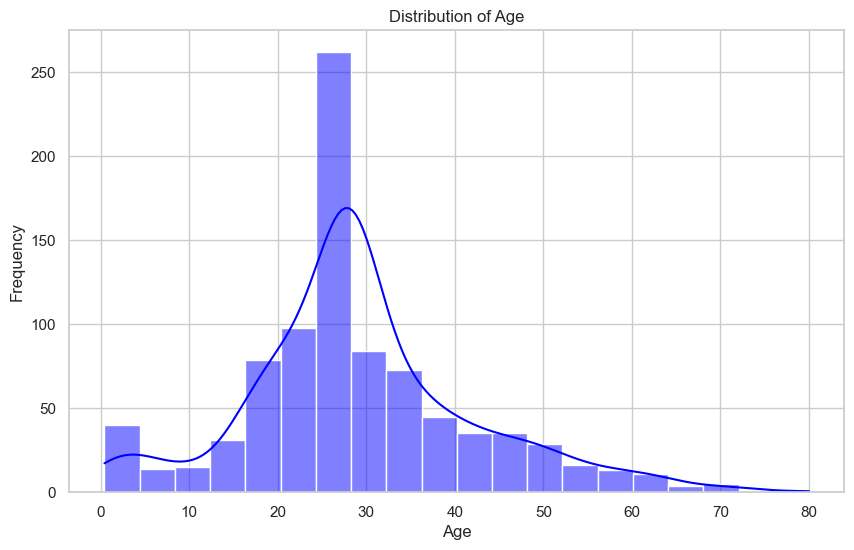

In [11]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Histogram of Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'].dropna(), kde=True, color='blue', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


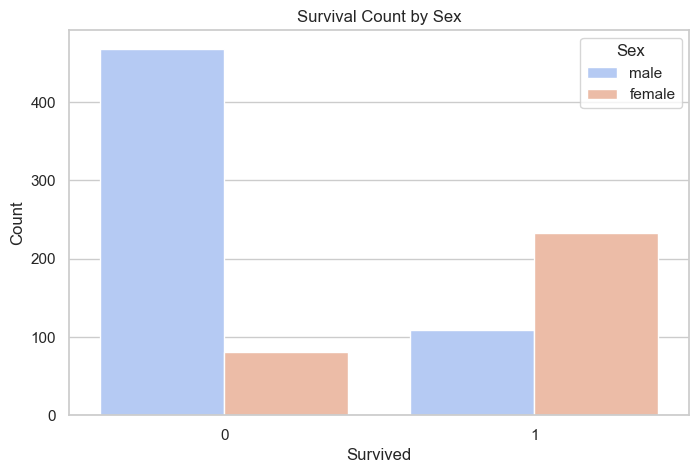

In [12]:
# Bar plot of survival by sex
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=data, palette='coolwarm')
plt.title('Survival Count by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

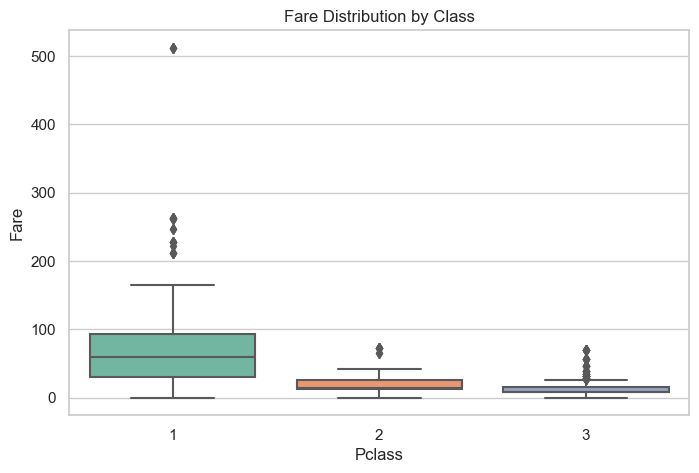

In [14]:
# Box plot of fare by class
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Fare', data=data, palette='Set2')
plt.title('Fare Distribution by Class')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

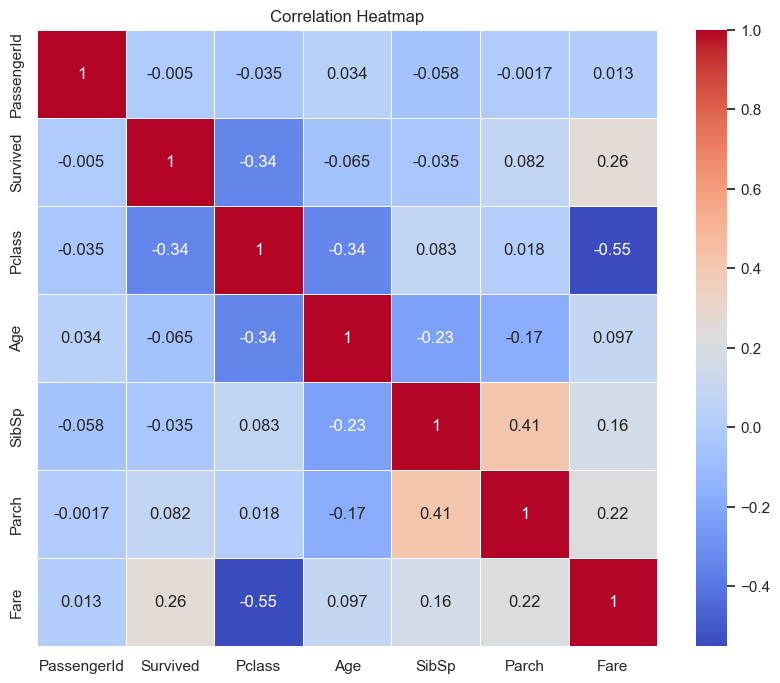

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# # Model Selection - Linear Regression & Training Data

In [28]:
from sklearn.linear_model import LinearRegression
#Step 1: Feature selection
# Define features (X) and target variable (y)
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']


# Step 2: Perform one-hot encoding

# One-hot encode the 'Sex' column
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\atiya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [43]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7988826815642458
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# Analysis on the predictive model - Classification Report
The predictive model achieved an accuracy of approximately 80%, indicating that it correctly predicted the survival outcome for about 80% of the passengers in the test dataset.

From the classification report:

- For passengers who did not survive (class 0), the precision is 82%, meaning that 82% of the predictions for non-survived passengers were correct. The recall is 85%, indicating that 85% of non-survived passengers were correctly identified by the model.
- For passengers who survived (class 1), the precision is 77%, indicating that 77% of the predictions for survived passengers were correct. The recall is 73%, indicating that 73% of the survived passengers were correctly identified by the model.
- The F1-score, which is the harmonic mean of precision and recall, is 0.83 for class 0 and 0.75 for class 1. The macro average F1-score is approximately 0.79, indicating overall good performance of the model.
- In conclusion, based on the features provided, the model can predict with approximately 80% accuracy whether an arbitrary passenger on the Titanic would survive the sinking or not.In conclusion, based on the features provided,

In [40]:
# Calculate predicted survival status based on predicted values
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Create a DataFrame to store actual and predicted survival status
survival_data = pd.DataFrame({
    'Actual Survived': y_test,
    'Predicted Survived': y_pred_binary
})

# Display the DataFrame with extra column indicating predicted survival status
survival_data.head(10)

,Actual Survived,Predicted Survived
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
290,1,1
300,1,1
333,0,0
208,1,1
136,1,1


In [41]:
# Joining the survival_data DataFrame with the original DataFrame using PassengerId as index
full_data = survival_data.join(data.set_index('PassengerId'), how='inner')

# Display the full DataFrame include this actual and predicted survived data 
print("Predicted Survival data")
full_data.head(10)
#where 1 being sufrvived and 0 being not survivied based on the callification report 

Predicted Survival data


,Actual Survived,Predicted Survived,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,1,0,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,Unknown,S
439,0,0,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
840,0,0,1,1,"Marechal, Mr. Pierre",male,28.0,0,0,11774,29.7000,C47,C
720,1,1,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,Unknown,S
39,1,1,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,Unknown,S
290,1,1,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,Unknown,Q
300,1,1,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
333,0,0,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
208,1,1,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,Unknown,C
136,1,1,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,Unknown,C


# Analysis on the Predicted Survival Data
The table represents the actual and predicted survival status for a subset of passengers from the Titanic dataset:

- Passenger 709: Actually survived (1), predicted not to survive (0)
- Passenger 439: Actually did not survive (0), predicted not to survive (0)
- Passenger 840: Actually did not survive (0), predicted not to survive (0)
- Passenger 720: Actually survived (1), predicted to survive (1)
- Passenger 39: Actually survived (1), predicted to survive (1)
- Passenger 290: Actually survived (1), predicted to survive (1)
- Passenger 300: Actually survived (1), predicted to survive (1)
- Passenger 333: Actually did not survive (0), predicted not to survive (0)
- Passenger 208: Actually survived (1), predicted to survive (1)
- Passenger 136: Actually survived (1), predicted to survive (1)
Overall, the model appears to perform reasonably well, with correct predictions for most of the passengers in this subset. However, there are some instances where the model's predictions do not match the actual outcomes.